# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [37]:
# importando bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [38]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [39]:
# informações

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


In [40]:
# informações

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


In [41]:
# missings

missing_values = df.isnull().sum()
print(missing_values)

age            0
sex            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope          0
ca             0
thal           0
num            0
flag_doente    0
dtype: int64


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [42]:
# função de bivariada

def bivariada(dataframe, resposta, explicativa):
    # Verificando se as variáveis existem no dataframe
    if resposta not in dataframe.columns or explicativa not in dataframe.columns:
        print("Variáveis não encontradas no dataframe.")
        return None
    tabela_dados = pd.crosstab(dataframe[resposta], dataframe[explicativa])
    
    return tabela_dados
    


In [43]:
# chamada de função bivariada - variável 'sex'
# sex:  (1 = male; 0 = female)

resultado_bivariada = bivariada(df, 'flag_doente', 'sex')
resultado_bivariada


sex,0.0,1.0
flag_doente,,
0,72,92
1,25,114


In [44]:
# chamada de função bivariada - variável 'cp'
# cp: tipo de dor no peito
      # 1: angina típica
      # 2: angina atípica
      # 3: dor não-angina
      # 4: assintomático

resultado_bivariada = bivariada(df, 'flag_doente', 'cp')
resultado_bivariada


cp,1.0,2.0,3.0,4.0
flag_doente,,,,
0,16,41,68,39
1,7,9,18,105


In [45]:
# chamada de função bivariada - variável 'fbs'
# fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)

resultado_bivariada = bivariada(df, 'flag_doente', 'fbs')
resultado_bivariada


fbs,0.0,1.0
flag_doente,,
0,141,23
1,117,22


2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [46]:
# função para categorizar determinada variável continua

def categorizar_continua(dataframe, variavel, num_categorias=5):
    # Verifica se a variável existe no dataframe
    if variavel not in dataframe.columns:
        print("Variável não encontrada no dataframe.")
        return None
    
    # Cria os limites dos intervalos
    limite_inferior = dataframe[variavel].min()
    limite_superior = dataframe[variavel].max()
    intervalo = (limite_superior - limite_inferior) / num_categorias
    limites = [limite_inferior + i * intervalo for i in range(num_categorias)]
    limites.append(limite_superior)  # Adiciona o limite superior para o último intervalo
    
    # Categoriza os valores
    categorias = ['Grupo {}'.format(i+1) for i in range(num_categorias)]
    dataframe['{}_categoria'.format(variavel)] = pd.cut(dataframe[variavel], bins=limites, labels=categorias, include_lowest=True)
    
    return dataframe

In [47]:
# chamando a função com "age"

df_categorizado_age = categorizar_continua(df, 'age', num_categorias=5)
df_categorizado_age

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,age_categoria
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,Grupo 4
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,Grupo 4
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,Grupo 4
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,Grupo 1
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,Grupo 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1,Grupo 2
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1,Grupo 5
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1,Grupo 3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1,Grupo 3


In [48]:
contagem_categorias = df['age_categoria'].value_counts()
print(contagem_categorias)

age_categoria
Grupo 4    107
Grupo 3     97
Grupo 2     71
Grupo 5     17
Grupo 1     11
Name: count, dtype: int64


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [49]:
# regressão logistica com muitas variáveis:
    # sex: sexo (1 = male; 0 = female)
    # cp: tipo de dor no peito
      # 1: angina típica
      # 2: angina atípica
      # 3: dor não-angina
      # 4: assintomático
    # trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital)
    # age_categoria: Grupo 1; Grupo 2; Grupo 3; Grupo 4; Grupo 5

reglog = smf.logit(" flag_doente ~ sex + C(cp) + trestbps + age_categoria"
                   , data=df_categorizado_age).fit()

reglog.summary()

Optimization terminated successfully.
         Current function value: 0.468265
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      293
Method:                           MLE   Df Model:                            9
Date:                Wed, 24 Apr 2024   Pseudo R-squ.:                  0.3211
Time:                        15:13:14   Log-Likelihood:                -141.88
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.610e-24
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -5.9256      1.561     -3.795      0.000      -8.986      -2.865
C(cp)[T.2.0]                 0.1530      0.652      0.235      0.814      -1.125       1.431
C(cp)[T.3.0]                 0.2536      0.586      0.433      0.665      -0.895       1.403
C(cp)[T.4.0]                 2.6516      0.570      4.652      0.000       1.534       3.769
age_categoria[T.Grupo 2]    -0.3526      0.858     -0.411      0.681      -2.034       1.329
age_categoria[T.Grupo 3]     0.2373      0.836      0.284      0.777      -1.402       1.876
age_categoria[T.Grupo 4]     1.1837      0.836      1.417      0.157      -0.454       2.822
age_categoria[T.Grupo 5]     0.6837      1.021      0.670      0.503      -1.317       2.684
sex                          1.8833      0.362      5.196      0.000       1.173       2.594
trestbps                     0.0193      0.009      2.242      0.025       0.002       0.036
============================================================================================
"""

In [50]:
# Interpretação dos parâmetros:
    # podemos inferir que a variável "cp" (tipo de dor no peito) não é significante no contexto das demais variáveis e podemos tirá-la do modelo;
    # podemos inferir que a variável "age_categoria" (idades) não é significante no contexto das demais variáveis e podemos tirá-la do modelo;

In [51]:
# regressão logistica com muitas variáveis:
    # sex: sexo (1 = male; 0 = female)
    # trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital)
   

reglog = smf.logit(" flag_doente ~ sex + trestbps"
                   , data=df_categorizado_age).fit()

reglog.summary()

Optimization terminated successfully.
         Current function value: 0.634169
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      300
Method:                           MLE   Df Model:                            2
Date:                Wed, 24 Apr 2024   Pseudo R-squ.:                 0.08057
Time:                        15:13:16   Log-Likelihood:                -192.15
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 4.869e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0092      1.014     -3.953      0.000      -5.997      -2.021
sex            1.3740      0.280      4.904      0.000       0.825       1.923
trestbps       0.0218      0.007      3.028      0.002       0.008       0.036
==============================================================================
"""

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [52]:
# Predito do modelo

df['predito'] = reglog.predict(df_categorizado_age)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,age_categoria,predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,Grupo 4,0.629761
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,Grupo 4,0.702400
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,Grupo 4,0.496315
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,Grupo 1,0.550733
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,Grupo 2,0.236784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1,Grupo 2,0.441984
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1,Grupo 5,0.624655
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1,Grupo 3,0.550733
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1,Grupo 3,0.236784


In [56]:
# Categorize a variável "predito" em 5 grupos

df['prob_predito'] = pd.qcut(df['predito'], q=5, labels=['Predito 1', 'Predito 2', 'Predito 3', 'Predito 4', 'Predito 5'])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,age_categoria,predito,prob_predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,Grupo 4,0.629761,Predito 5
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,Grupo 4,0.702400,Predito 5
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,Grupo 4,0.496315,Predito 3
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,Grupo 1,0.550733,Predito 4
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,Grupo 2,0.236784,Predito 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1,Grupo 2,0.441984,Predito 2
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1,Grupo 5,0.624655,Predito 5
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1,Grupo 3,0.550733,Predito 4
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1,Grupo 3,0.236784,Predito 1


In [57]:
# Crosstab ente os grupos "prob_predito" e "flag_doente"

tab = pd.crosstab(df['prob_predito'], df['flag_doente'], margins= True)
tab

flag_doente,0,1,All
prob_predito,,,
Predito 1,53,11,64
Predito 2,32,29,61
Predito 3,26,32,58
Predito 4,37,40,77
Predito 5,16,27,43
All,164,139,303


In [59]:
# Calcule a probabilidade de evento predita média por grupo
    # probabilidade = numero eventos / numero de amostras

tab['probabilidade'] = tab[1]/tab['All']
tab['probabilidade']

prob_predito
Predito 1    0.171875
Predito 2    0.475410
Predito 3    0.551724
Predito 4    0.519481
Predito 5    0.627907
All          0.458746
Name: probabilidade, dtype: float64

In [66]:
# Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
    # taxa eventos = número eventos / total amostras
    # tab['All']['All'] = total da amostra

tab['taxa_evento'] = tab[1]/tab['All']['All']
tab['taxa_evento']

prob_predito
Predito 1    0.036304
Predito 2    0.095710
Predito 3    0.105611
Predito 4    0.132013
Predito 5    0.089109
All          0.458746
Name: taxa_evento, dtype: float64

In [70]:
# Calibragem
    # dividir o "predito" em 5 categorias

cat_predito = pd.qcut(df['predito'], 5, duplicates='drop')
cat_predito.value_counts().sort_index()


predito
(0.123, 0.27]     64
(0.27, 0.453]     61
(0.453, 0.524]    58
(0.524, 0.604]    77
(0.604, 0.826]    43
Name: count, dtype: int64

In [75]:
# agrupar os valores com "groupBy"

group_reg = df.groupby(cat_predito)
qualid = group_reg[['flag_doente']].count().rename(columns = {'flag_doente': 'contagem'})
qualid

C:\Users\Cristina\AppData\Local\Temp\ipykernel_6428\3172064203.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_reg = df.groupby(cat_predito)


,contagem
predito,
"(0.123, 0.27]",64
"(0.27, 0.453]",61
"(0.453, 0.524]",58
"(0.524, 0.604]",77
"(0.604, 0.826]",43


In [76]:
# média dos preditos

qualid['predito'] = group_reg['predito'].mean()
qualid

,contagem,predito
predito,,
"(0.123, 0.27]",64,0.212737
"(0.27, 0.453]",61,0.380211
"(0.453, 0.524]",58,0.500102
"(0.524, 0.604]",77,0.570865
"(0.604, 0.826]",43,0.679752


In [78]:
# média da probabilidade dos preditos

qualid['probabilidade'] = group_reg['flag_doente'].mean()
qualid

,contagem,predito,probabilidade
predito,,,
"(0.123, 0.27]",64,0.212737,0.171875
"(0.27, 0.453]",61,0.380211,0.475410
"(0.453, 0.524]",58,0.500102,0.551724
"(0.524, 0.604]",77,0.570865,0.519481
"(0.604, 0.826]",43,0.679752,0.627907


Text(0.5, 0, 'Grupo')

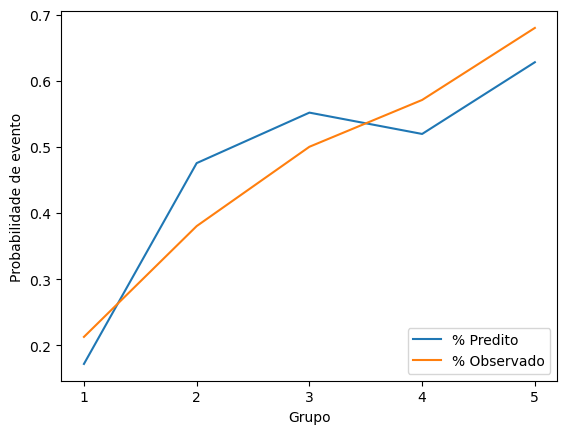

In [82]:
# Compare graficamente o valor esperado x observado para a taxa de maus por grupo

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['probabilidade'].plot(label='% Predito')
ax = qualid['predito'].plot(label='% Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

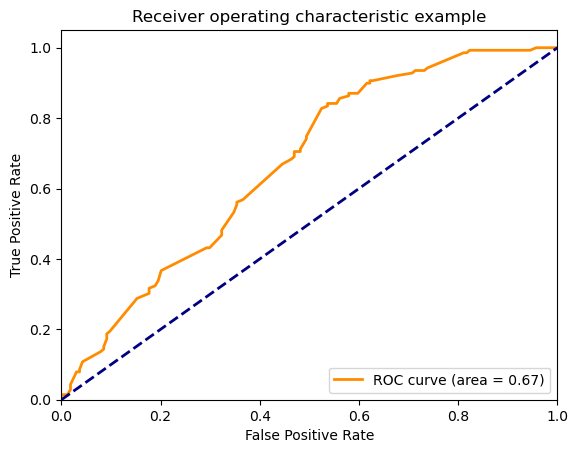

In [86]:
# curva ROC

from sklearn.metrics import roc_curve
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])

plt.figure()
lw = 2

fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

Text(0, 0.5, 'Função Distribuição Acumulada')

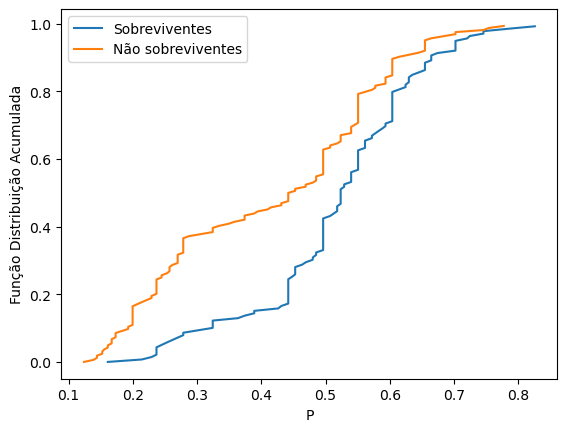

In [90]:
# gráfico KS

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

score_pop1 = df.loc[df['flag_doente']==1,'predito']
ax.plot(np.sort(score_pop1), np.linspace(0, 1, len(score_pop1), endpoint=False), label='Sobreviventes')

score_pop2 = df.loc[df['flag_doente']!=1,'predito']
ax.plot(np.sort(score_pop2), np.linspace(0, 1, len(score_pop2), endpoint=False), label='Não sobreviventes')
ax.legend()

ax.set_xlabel('P')
ax.set_ylabel('Função Distribuição Acumulada')

In [92]:
# Indicadores - acurácia, GINI e KS.

from sklearn import metrics
from scipy.stats import ks_2samp

acc = metrics.accuracy_score(df['flag_doente'], df['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 60.40%
KS: 30.51% 
AUC: 66.72% 
GINI: 33.44%


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [93]:
# A acurácia é uma medida da precisão global do modelo. A acurácia do modelo é razoável - 60.4 %.  
# O KS é uma medida da capacidade discriminativa do modelo entre as classes positiva e negativa. 
# Quanto maior o valor de KS, melhor a capacidade do modelo em separar as duas classes. No caso apresentado, o KS é de 30.51%.
# O índice Gini é calculado como o dobro da área entre a curva ROC e a linha de referência (linha diagonal). 
# Quanto maior o valor de GINI, melhor o poder de classificação do modelo. No caso apresentado, o GINI é de 33.44%.

# Essas métricas sugerem que o modelo é melhor do que um classificador aleatório, mas ainda há espaço para melhorias, 
# especialmente em termos de discriminação entre as classes positiva e negativa.